In [1]:
from math import cos, sin

In [2]:
R = 10.0
n = 1.5 #number of twists
x0,y0,z0 = (10.0, 0.0, 1.0)
vx,vy,vz = (0.0, 0.0, -1.0)

In [3]:
def s1(b):
    nb = n*b
    return (sin(nb)*(x0 - R*cos(b)) - z0*cos(b)*cos(nb))/(vz*cos(b)*cos(nb) - vx*sin(nb))

def s2(b):
    nb = n*b
    return (sin(nb)*(y0 - R*sin(b)) - z0* sin(b)*cos(nb))/(vz* sin(b)*cos(nb) - vy*sin(nb))

def s3(b): 
    nb = n*b
    return (sin(b)*cos(nb)*(x0 - R*cos(b)) - cos(b)*cos(nb)*(y0 - R*sin(b)))/(vy*cos(b)*cos(nb) - vx*sin(b)*cos(nb))

In [8]:
def newton(e1, e2, guess, verbose=False):
    tol = 1e-6
    x = guess
    for i in range(40): 
        sx = e1(x) - e2(x)
        ds = (e1(x+tol) - e1(x-tol) - e2(x+tol) + e2(x-tol))/(2*tol)
        if verbose:
            print "x = " + str(x)
            print "sx = " + str(sx)
            print "ds(x) = " + str(ds)
        x -= sx/ds
    return x

In [9]:
newton(s1, s2, 0.1)

-1.8240920693570362e-18

In [29]:
intercepts = set()
for i in range(1,64):
    try: 
        newt = newton(s1, s2, i*0.1)
        nn = round(newt, 10)
        if nn <= 6.28318530718:
            intercepts.add(nn)
    except:
        print i*0.1
intercepts

l = []
for i in intercepts: 
    b = i
    c = s1(i)
    a = (x0 + vx*c - R*cos(b))/(cos(n*b)*cos(b))
    l.append((a,b,c))
    

In [30]:
l

[(0.0, -0.0, 1.0),
 (29.999999999764288, 2.0943951024, 1.0000000003062046),
 (-30.00000000047143, 4.1887902048, 1.0000000006124095)]

In [31]:
def mob_point(x,y,R, spins=1):
    xcy2 = x*cos(spins*y/2)
    return (((R + xcy2)*cos(y)), ((R + xcy2)*sin(y)), x*sin(spins*y/2))

In [34]:
mob_point(0, 0, R,spins=n*2)

(10.0, 0.0, 0.0)

In [ ]:
def ds1(x):
    a,b,c = x0,y0,z0
    d,e,f = vx,vy,vz
    nx = n*x
    t1 = ((n*cos(nx)*(x0-R*cos(x)) + z0*sin(x)*cos(nx) + z0*n*cos(x)*sin(nx) + R*sin(x)*sin(nx))/(vz*cos(x)*cos(nx) - vx*sin(nx))) 
    t2 = (((-vx*n*cos(n*x) - vz*sin(x)*cos(nx) - vz*n*cos(x)*sin(nx))*(sin(nx)*(x0 - R*cos(x)) - z0*cos(x)*cos(nx)))/((f*cos(x)*cos(nx) - d*sin(nx))**2))
    return t1-t2
    
def ds2(x):
    a,b,c = x0,y0,z0
    d,e,f = vx,vy,vz
    nx = n*x
    t1 = (n*cos(nx)*(x0-R*sin(x)) + z0*n*sin(x)*sin(nx) - z0*cos(x)*cos(nx) - R*cos(x)*sin(nx))/(vz*sin(x)*cos(nx) - vy*sin(n*x))
    t2 = ((-vz*n*sin(x)*sin(nx) + vz*cos(x)*cos(nx) - vy*n*cos(n*x))*(sin(nx)*(y0 - R*sin(x)) - z0*sin(x)*cos(nx)))/((vz*sin(x)*cos(nx) - vy*sin(n*x))**2)
    return t1-t2

def ds3(b):
    nb = n*b

In [35]:
from PIL import Image
from IPython.display import display, clear_output
import numpy as np

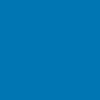

In [43]:
im_size = 25 #units 
ppu = 4 #pixels per unit
size = im_size*ppu
im_arr = np.zeros((size, size, 3), dtype = np.uint8)

radius = 10 #radius of the mobius strip
width = 1  #width of the mobius strip

for i in range(size):
    #print i
    for j in range(size):
        x = i/ppu + 1/(2*ppu) - im_size/2
        y = j/ppu + 1/(2*ppu) - im_size/2
        z = 4
        v = np.asarray([0,0,-1], dtype=np.float64)
        r0 = np.asarray([x,y,z], dtype=np.float64)
        
        im_arr[i][j] = np.asarray([0,120,180], dtype=np.uint8)

vf = Image.fromarray(im_arr)
display(vf)